In [1]:
from PIL import Image, ImageFilter,ImageDraw
import math
import csv
from glob import glob
import os

In [2]:
'''
    color_list:图片中所有像素的列表
    depth：切分的深度
'''
def median_cut(color_list,depth):
    '''一分为二的情况'''
    if(depth==1):
        sumr=0
        sumg=0
        sumb=0
        for i in color_list:
            r,g,b=i
            sumr+=r
            sumb+=b
            sumg+=g
        sumr=int(math.ceil(sumr/len(color_list)))
        sumg=int(math.ceil(sumg/len(color_list)))
        sumb=int(math.ceil(sumb/len(color_list)))
        '''sumr,sumg,sumb为映射的r，g，b；len(color_list)为这个块中的像素个数'''
        lut.append((sumr,sumg,sumb,len(color_list)))
        return 0


    
    red=[]
    blue=[]
    green=[]
    '''收集图片中RGB，每个通道的数值的list'''
    for i in color_list:
        r, g, b=i
        red.append(r)
        blue.append(b)
        green.append(g)
        
    '''计算每个通道数值的length'''
    diffr=max(red)-min(red)
    diffb=max(blue)-min(blue)
    diffg=max(green)-min(green)
    
    '''根据分布length最长的那个通道，对所有像素值进行排序'''
    if(max(diffg,diffb,diffr)==diffr):
        color_list.sort(key=lambda x: x[0])
    elif(max(diffg,diffb,diffr)==diffb):
        color_list.sort(key=lambda x: x[1])
    else:
        color_list.sort(key=lambda x: x[2])
        
    '''按中位数切割（递归）'''
    mid=len(color_list)/2
    mid=int(mid)    
    median_cut(color_list[:mid],depth-1)
    median_cut(color_list[mid:],depth-1)

    

In [3]:
'''长边缩放100的方法'''
def ZoomImgTo100(img):
    (w,h)=img.size
    if w>h:
        h=int(h*100/w)
        w=100
    else:
        w=int(w*100/h)
        h=100
    img=img.resize((w,h))
    return img

In [4]:

'''所有图片的颜色列表'''
image_color=[]
'''中位切分后的颜色列表'''
lut=[]
'''获取图片列表'''
img_list=glob('./data/*jpeg')
for item in img_list:
    '''打开图片'''
    img = Image.open(item)
    '''将图片长边缩放到100'''
    img=ZoomImgTo100(img)
    '''将图片转换到rgb通道'''
    rgb_img = img.convert('RGB')
    '''获取图片长宽'''
    width, height = rgb_img.size
    
    for i in range(width):
        for j in range(height):
            image_color.append(rgb_img.getpixel((i, j)))

# print(len(image_color))
median_cut(image_color,depth=5)
print((lut))





[(29, 57, 8, 2306), (48, 78, 22, 2306), (57, 93, 32, 2306), (66, 103, 42, 2307), (74, 111, 52, 2306), (82, 118, 64, 2306), (88, 128, 78, 2306), (94, 137, 103, 2307), (139, 116, 90, 2306), (152, 142, 112, 2306), (164, 155, 124, 2306), (164, 167, 122, 2307), (159, 178, 123, 2306), (164, 192, 131, 2306), (187, 209, 148, 2306), (211, 231, 169, 2307)]


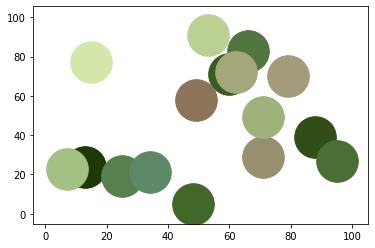

In [6]:
import numpy as np
from matplotlib import pyplot as plt
for item in lut:
    p1 = plt.scatter(np.random.randint(100), np.random.randint(100), marker = '.',
                     color = [item[0]/255,item[1]/255,item[2]/255], s = item[3]*3)